**STEP 1 — Import Libraries & Load Data**

In [49]:
import pandas as pd
import numpy as np
#load dataset

df_raw = pd.read_csv("/content/sweggy.csv", encoding='latin1')
df = df_raw.copy()
# Display first 5 rows
print(df.head())

# Check Shape
print("shape of dataset:", df.shape)

       State       City Order Date           Restaurant Name  \
0  Karnataka  Bengaluru   29-06-25  Anand Sweets & Savouries   
1  Karnataka  Bengaluru   03-04-25     Srinidhi Sagar Deluxe   
2  Karnataka  Bengaluru   15-01-25     Srinidhi Sagar Deluxe   
3  Karnataka  Bengaluru   17-04-25     Srinidhi Sagar Deluxe   
4  Karnataka  Bengaluru   13-03-25     Srinidhi Sagar Deluxe   

               Location     Category             Dish Name  Price (INR)  \
0  Rajarajeshwari Nagar        Snack  Butter Murukku-200gm        133.9   
1               Kengeri  Recommended            Badam Milk         52.0   
2               Kengeri  Recommended        Chow Chow Bath        117.0   
3               Kengeri  Recommended           Kesari Bath         65.0   
4               Kengeri  Recommended            Mix Raitha        130.0   

   Rating  Rating Count  
0     4.0             0  
1     4.5            25  
2     4.7            48  
3     4.6            65  
4     4.0             0  
shape of

**STEP 2 — Basic Data Inspection**

This helps us understand what needs cleaning.


In [37]:
#column name
#print('column:')
print(df.columns)

# Data types
print('\nData Types:')
print(df.dtypes)

print('\ninfo:')
print(df.info())

# statistical summary
print('\nstatistical summary')
print(df.describe())


Index(['State', 'City', 'Order Date', 'Restaurant Name', 'Location',
       'Category', 'Dish Name', 'Price (INR)', 'Rating', 'Rating Count'],
      dtype='object')

Data Types:
State               object
City                object
Order Date          object
Restaurant Name     object
Location            object
Category            object
Dish Name           object
Price (INR)        float64
Rating             float64
Rating Count         int64
dtype: object

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            197430 non-null  object 
 1   City             197430 non-null  object 
 2   Order Date       197430 non-null  object 
 3   Restaurant Name  197430 non-null  object 
 4   Location         197430 non-null  object 
 5   Category         197430 non-null  object 
 6   Dish Name        197430 non-null  objec

**STEP 3 — Clean Column Names**

Remove spaces, special characters, and make lowercase.

In [55]:
# 1. SCRUB (The regex we used earlier to remove those \x83 ghost characters)
df.columns = df.columns.str.replace(r'[^\x00-\x7F]+', '', regex=True).str.strip()
# This shows you the names with quotes so you can see hidden spaces
#print([f"'{col}'" for col in df.columns])
# 2. RENAME (Do this while they still have their original casing)
df = df.rename(columns={
    'price_(inr)': 'price',
    'category': 'category',
    'order_date': 'date'})
print(df.columns)

Index(['state', 'city', 'date', 'restaurant_name', 'location', 'category',
       'dish_name', 'price', 'rating', 'rating_count'],
      dtype='object')


In [56]:
# 3. STANDARDIZE (Lowercase and underscores for any OTHER columns)
df.columns = df.columns.str.lower().str.replace(" ", "_")

# CREATE COPY 2
df_clean_cols = df.copy()

print("Cleaned Columns List:")
print(df_clean_cols.columns.tolist())

Cleaned Columns List:
['state', 'city', 'date', 'restaurant_name', 'location', 'category', 'dish_name', 'price', 'rating', 'rating_count']


**STEP 4 — Check Missing Values**
Handling Missing Values
Option 1: Drop rows (if very few)
Option 2: Fill numerical with median
Option 3: Fill categorical with mode

In [57]:
# Count missing values
print("Missing Values Count:")
print(df.isnull().sum())

# Percentage of missing values
print("\nMissing Value Percentage:")
print((df.isnull().sum() / len(df)) * 100)

Missing Values Count:
state              0
city               0
date               0
restaurant_name    0
location           0
category           0
dish_name          0
price              0
rating             0
rating_count       0
dtype: int64

Missing Value Percentage:
state              0.0
city               0.0
date               0.0
restaurant_name    0.0
location           0.0
category           0.0
dish_name          0.0
price              0.0
rating             0.0
rating_count       0.0
dtype: float64


**Handle Missing Values**

In [5]:
#  Drop rows (if very few)
#df = df.dropna()
#  Fill numerical with median
#num_cols = df.select_dtypes(include=np.number).columns
#df[num_cols] = df[num_cols].fillna(df[num_cols].median())
#  Option 3: Fill categorical with mode
#cat_cols = df.select_dtypes(include='object').columns
#for col in cat_cols:
    #df[col] = df[col].fillna(df[col].mode()[0])

**STEP 5 — Remove Duplicates**

In [58]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 27


**To Remove duplicates row**

In [59]:
df = df.drop_duplicates()
print("After Removing Duplicates:", df.shape)
df_remove_duplicated = df.copy()

After Removing Duplicates: (197403, 10)


**STEP 6 — Fix Data Types**

Convert numeric columns stored as object.

In [60]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

#print(df.dtypes)
df_dtypes = df.copy()
print(df.head())

       state       city      date           restaurant_name  \
0  Karnataka  Bengaluru  29-06-25  Anand Sweets & Savouries   
1  Karnataka  Bengaluru  03-04-25     Srinidhi Sagar Deluxe   
2  Karnataka  Bengaluru  15-01-25     Srinidhi Sagar Deluxe   
3  Karnataka  Bengaluru  17-04-25     Srinidhi Sagar Deluxe   
4  Karnataka  Bengaluru  13-03-25     Srinidhi Sagar Deluxe   

               location     category             dish_name  price  rating  \
0  Rajarajeshwari Nagar        Snack  Butter Murukku-200gm  133.9     4.0   
1               Kengeri  Recommended            Badam Milk   52.0     4.5   
2               Kengeri  Recommended        Chow Chow Bath  117.0     4.7   
3               Kengeri  Recommended           Kesari Bath   65.0     4.6   
4               Kengeri  Recommended            Mix Raitha  130.0     4.0   

   rating_count  
0             0  
1            25  
2            48  
3            65  
4             0  


In [61]:
# 1. Force the column to string and strip hidden spaces/newlines
df['date'] = df['date'].astype(str).str.strip()

# 2. Convert using 'dayfirst' which is smarter for DD-MM-YYYY
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# 3. Drop the rows that are truly broken (the NaT rows)
# This prevents your graphs from crashing later
df = df.dropna(subset=['date'])

# 4. Success Check
print(f"Success! Dataframe now has {len(df)} valid rows.")
print("First 5 converted dates:")
print(df['date'].head())

Success! Dataframe now has 197403 valid rows.
First 5 converted dates:
0   2025-06-29
1   2025-04-03
2   2025-01-15
3   2025-04-17
4   2025-03-13
Name: date, dtype: datetime64[ns]


/tmp/ipython-input-486/3032042322.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')


**How to verify it worked**
Run this right after you convert:

**STEP 7 — Outlier Detection (IQR Method)**

In [62]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Shape after outlier removal:", df.shape)
df_outlier = df.copy()

Shape after outlier removal: (127817, 10)


**STEP 8 — Final Check**

In [63]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 127817 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   state            127817 non-null  object        
 1   city             127817 non-null  object        
 2   date             127817 non-null  datetime64[ns]
 3   restaurant_name  127817 non-null  object        
 4   location         127817 non-null  object        
 5   category         127817 non-null  object        
 6   dish_name        127817 non-null  object        
 7   price            127817 non-null  float64       
 8   rating           127817 non-null  float64       
 9   rating_count     127817 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 10.7+ MB
None
                                date          price         rating  \
count                         127817  127817.000000  127817.000000   
mean   2025-05-01 1

**STEP 9 — Save Clean Dataset**

In [64]:
df.to_csv("Swiggy_Cleaned_Data.csv", index=False)

Total Sales --- Average Rating --- Average Order Value -- Rating Count --- Total Orders --- Monthly Sales Trend --- Daily Sales Trend-- Total Sales By food Type by( Veg or non veg) --- Total sales by state (Map visualization) --- Quarterly Performance Summary--- Top 5 cities by sales--- Weekly trend analysis---

**Next Step Analysis**

1️⃣ Total Sales

In [65]:
total_sales = df['price'].sum()
print("Total Sales:", total_sales)

Total Sales: 30656097.81


**⭐ 2️⃣ Average Rating**

In [66]:
avg_rating = df['rating'].mean()
print("Average Rating:", round(avg_rating,3))

Average Rating: 4.41


**💰 3️⃣ Average Order Value (AOV)**

In [67]:
avg_order_value = df['price'].mean()
print("Average Order Value:", round(avg_order_value,2))

Average Order Value: 239.84


**🗳 4️⃣ Rating Count**

In [68]:
rating_count = df['rating'].count()
print("Total Rating Count:", rating_count)

Total Rating Count: 127817


**📦 5️⃣ Total Orders**

In [69]:
total_orders = df['dish_name'].count()
print("Total Orders:", total_orders)

Total Orders: 127817


Original data looks like this:
0    29-06-25
1    03-04-25
2    15-01-25
3    17-04-25
4    13-03-25
Name: Order Date, dtype: object


**📅 Convert Date Column (IMPORTANT)**

Before time analysis:**

In [70]:
df['date'] = pd.to_datetime(df['date'],format='%d-%m-%Y', errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter

**📊 6️⃣ Monthly Sales Trend**

In [39]:
# Example A: Create a 'Month' column from your date
df['month'] = df['date'].dt.month_name()

# Example B: Create a 'Tax' column (5% of price)
#df['tax_amount'] = df['price'] * 0.05

# Example C: Create a 'Total' column
#df['total_cost'] = df['price'] + df['tax_amount']

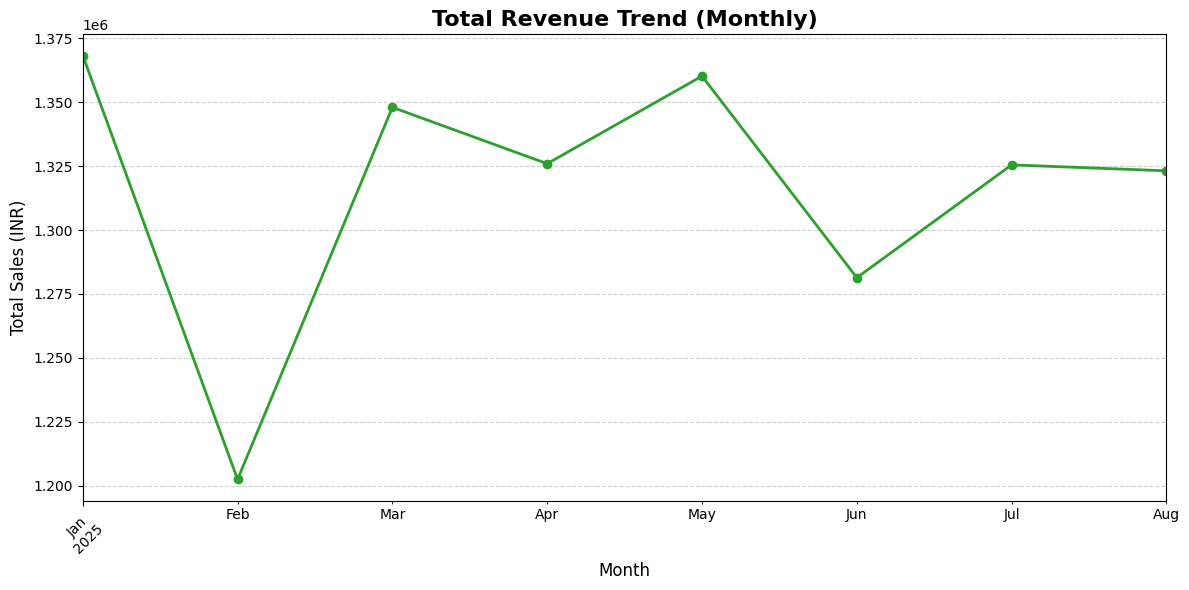

In [40]:
import matplotlib.pyplot as plt

# 1. Create a "Month" column for grouping
# This creates a label like '2025-01' so the months stay in order
df['year_month'] = df['date'].dt.to_period('M')

# 2. Group by the new Month column and sum the price
# We sort_index() to ensure January comes before February
monthly_trend = df.groupby('year_month')['price'].sum().sort_index()

# 3. Plotting
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='#2ca02c', linewidth=2)

# 4. Customizing the labels
plt.title('Total Revenue Trend (Monthly)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# This makes sure the month labels on the bottom are easy to read
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**📈 7️⃣ Daily Sales Trend**

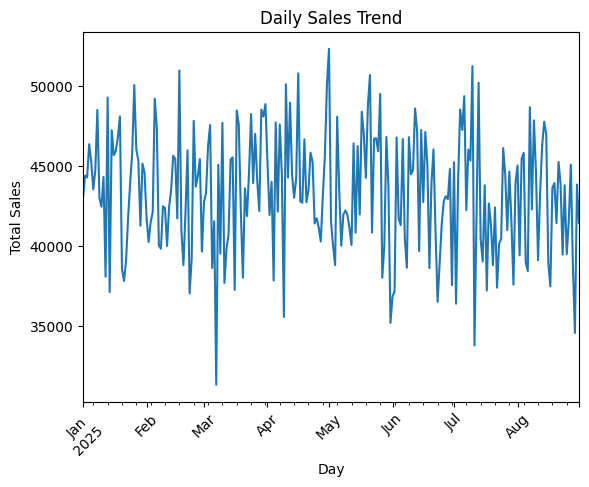

In [42]:
import matplotlib.pyplot as plt

daily_sales = df.groupby('date')['price'].sum()

plt.figure()
daily_sales.plot(kind='line')
plt.title("Daily Sales Trend")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

**🥗 8️⃣ Total Sales by Food Type (Veg / Non-Veg)**

In [71]:
# 1. Define your Non-Veg keywords
non_veg_keywords = ['chicken', 'mutton', 'egg', 'fish', 'prawn', 'meat', 'beef', 'pork', 'kebab', 'tikka','pizza']

# 2. Create a function to check the dish name
def categorize_food(dish):
    dish = str(dish).lower() # Convert to lowercase for matching
    if any(keyword in dish for keyword in non_veg_keywords):
        return 'Non-Veg'
    return 'Veg'

# 3. Apply the function to a new column
df['food_type'] = df['dish_name'].apply(categorize_food)

# CREATE CHECKPOINT
df_with_types = df.copy()

In [72]:
food_sales = df.groupby('food_type')['price'].sum()
print(food_sales)

food_type
Non-Veg    12306896.71
Veg        18349201.10
Name: price, dtype: float64


**🗺 9️⃣ Total Sales by State (Map Visualization)**

In [77]:
import plotly.express as px

# 2. Re-calculate sales
statewise_sales = df.groupby('state')['price'].sum().reset_index()

# 3. Create the Map
fig = px.choropleth(
    statewise_sales,
    locations='state',           # Column with state names
    locationmode='country names', # Tells Plotly to look for names, not codes
    color='price',               # The data determining the color
    hover_name='state',
    title='State-wise Sales Distribution',
    scope='asia'                 # Zooms the map into Asia/India
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**📊 🔟 Quarterly Performance Summary**

In [78]:
quarter_summary = df.groupby('quarter').agg({
    'price':'sum',
    'dish_name':'count',
    'rating':'mean'
}).reset_index()


print(quarter_summary)

   quarter        price  dish_name    rating
0        1  11335752.34      47235  4.410088
1        2  11590563.60      48247  4.409545
2        3   7729781.87      32335  4.411198


**🏙 1️⃣1️⃣ Top 5 Cities by Sales**

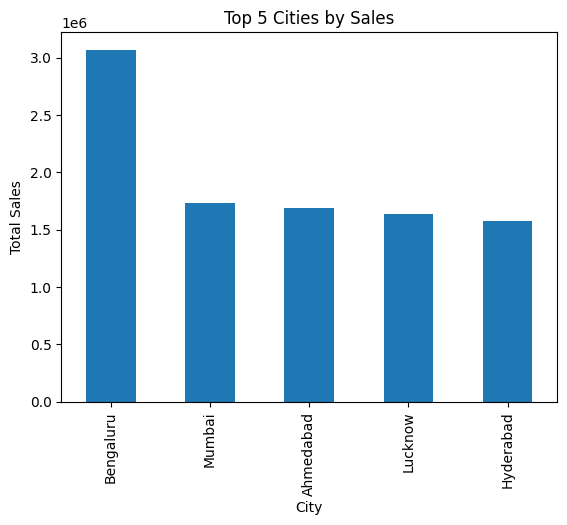

In [81]:
top_cities = df.groupby('city')['price'].sum().sort_values(ascending=False).head(5)
import matplotlib.pyplot as plt
plt.figure()
top_cities.plot(kind='bar')
plt.title("Top 5 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

**📆 1️⃣2️⃣ Weekly Trend Analysis**

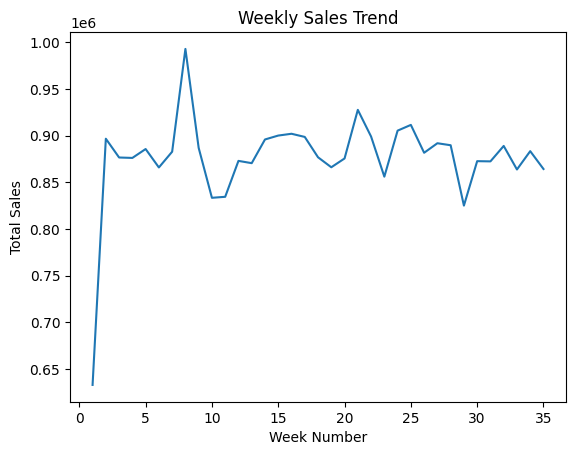

In [82]:
weekly_sales = df.groupby('week')['price'].sum()

plt.figure()
weekly_sales.plot(kind='line')
plt.title("Weekly Sales Trend")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.show()

**📌 PROFESSIONAL DASHBOARD METRICS SUMMARY**

In [83]:
print("----- KPI SUMMARY -----")
print("Total Sales:", total_sales)
print("Total Orders:", total_orders)
print("Average Order Value:", round(avg_order_value,2))
print("Average Rating:", round(avg_rating,2))
print("Rating Count:", rating_count)

----- KPI SUMMARY -----
Total Sales: 30656097.81
Total Orders: 127817
Average Order Value: 239.84
Average Rating: 4.41
Rating Count: 127817


In [86]:
print(df.head(3))

       state       city       date           restaurant_name  \
0  Karnataka  Bengaluru 2025-06-29  Anand Sweets & Savouries   
1  Karnataka  Bengaluru 2025-04-03     Srinidhi Sagar Deluxe   
2  Karnataka  Bengaluru 2025-03-13     Srinidhi Sagar Deluxe   

               location     category             dish_name  price  rating  \
0  Rajarajeshwari Nagar        Snack  Butter Murukku-200gm  133.9     4.0   
1               Kengeri  Recommended            Badam Milk   52.0     4.5   
2               Kengeri  Recommended            Mix Raitha  130.0     4.0   

   rating_count  month  quarter  
0             0   June        2  
1            25  April        2  
2             0  March        1  


**PART 2 — POWER BI STYLE DASHBOARD (IN PYTHON)**

In [90]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

df = pd.read_csv("Swiggy_Cleaned_Data.csv")
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()
df['quarter'] = df['date'].dt.quarter

# KPIs
total_sales = df['price'].sum()
total_orders = df['dish_name'].nunique()
avg_rating = df['rating'].mean()
aov = df['price'].mean()

# Create subplot layout
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Monthly Sales", "Top 5 Cities",
                    "Food Type Sales", "Quarterly Performance"),
    # Specify 'domain' type for the pie chart subplot
    specs=[[{}, {}],
           [{'type': 'domain'}, {}]]
)

# Monthly Sales
monthly = df.groupby('month')['price'].sum().reset_index()
fig.add_trace(
    go.Scatter(x=monthly['month'], y=monthly['price'],
               mode='lines+markers'),
    row=1, col=1
)

# Top Cities
top_cities = df.groupby('city')['price'].sum().sort_values(ascending=False).head(5)
fig.add_trace(
    go.Bar(x=top_cities.index, y=top_cities.values),
    row=1, col=2
)

# Food Type
food_sales = df.groupby('dish_name')['price'].sum()
fig.add_trace(
    go.Pie(labels=food_sales.index, values=food_sales.values),
    row=2, col=1
)

# Quarterly
quarter = df.groupby('quarter')['price'].sum() # Corrected 'pricet' to 'price'
fig.add_trace(
    go.Bar(x=quarter.index, y=quarter.values),
    row=2, col=2
)

fig.update_layout(height=800, width=1200,
                  title_text="Swiggy Power BI Style Dashboard",
                  showlegend=False)

fig.show()

print("Total Sales:", total_sales)
print("Total Orders:", total_orders)
print("Average Rating:", round(avg_rating,2))
print("Average Order Value:", round(aov,2))

Total Sales: 30656097.81
Total Orders: 43591
Average Rating: 4.41
Average Order Value: 239.84
